In [1]:
# pre setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
advertising_file_path = '../data/08-Linear-Regression-Models/Advertising.csv'

In [5]:
df = pd.read_csv(advertising_file_path)

In [7]:
X = df.drop('sales', axis=1)
y = df['sales']

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [21]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [22]:
poly_features = polynomial_converter.transform(X)

In [27]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [28]:
df.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
test_prediction = model.predict(X_test)

In [35]:
model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

In [42]:
{'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE}

{'MAE': 0.4842810535215462,
 'MSE': 0.4202814842156832,
 'RMSE': 0.6482912032533552}

In [43]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [44]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND TEST
# PLOT the result(error vs poly order)

In [47]:
train_rmse_erros = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_erros.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [48]:
train_rmse_erros

[1.737651598244771,
 0.5947926597019146,
 0.44059734232363645,
 0.35329132820381126,
 0.24845372164635351,
 0.18843697233723344,
 5.496693080253056,
 0.15381229302162097,
 0.1490012485137228]

In [49]:
test_rmse_errors

[1.5324409426512418,
 0.6482912032533552,
 0.5577254823365609,
 0.5064297299297431,
 2.357361528919361,
 11.249526622660555,
 1352.2757499665267,
 3219.2279436745685,
 166836.70825331926]

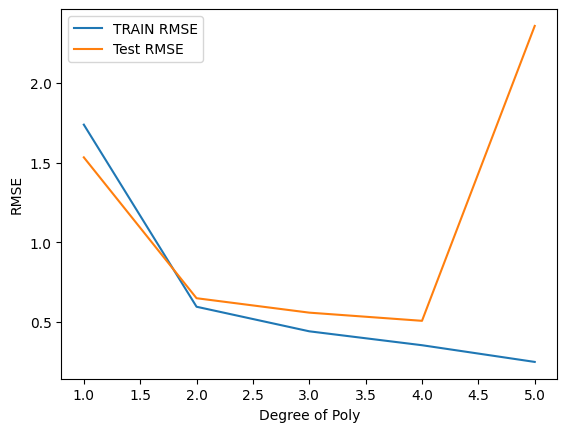

In [54]:
plt.plot(range(1,6), train_rmse_erros[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [55]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [56]:
final_model = LinearRegression()

In [57]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [58]:
from joblib import dump,load

In [59]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [60]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']